# Image Exploration

In [8]:
import os
import tensorflow as tf
import sys
import time
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
cwd = os.getcwd()
cwd

'/Users/tangtang.zhou/Documents/GitHubProjects/homework_2_anndl/notebook'

In [3]:
sys.path.append("../")

In [4]:
from src.data_reader import read_train_valid_data

In [5]:
data_path = os.path.join(cwd, "..", "data")

train_dataset, valid_dataset, train_gen, valid_gen = read_train_valid_data(data_path)

Found 6118 images belonging to 1 classes.
Found 6118 images belonging to 1 classes.
Found 1529 images belonging to 1 classes.
Found 1529 images belonging to 1 classes.


<IPython.core.display.Javascript object>


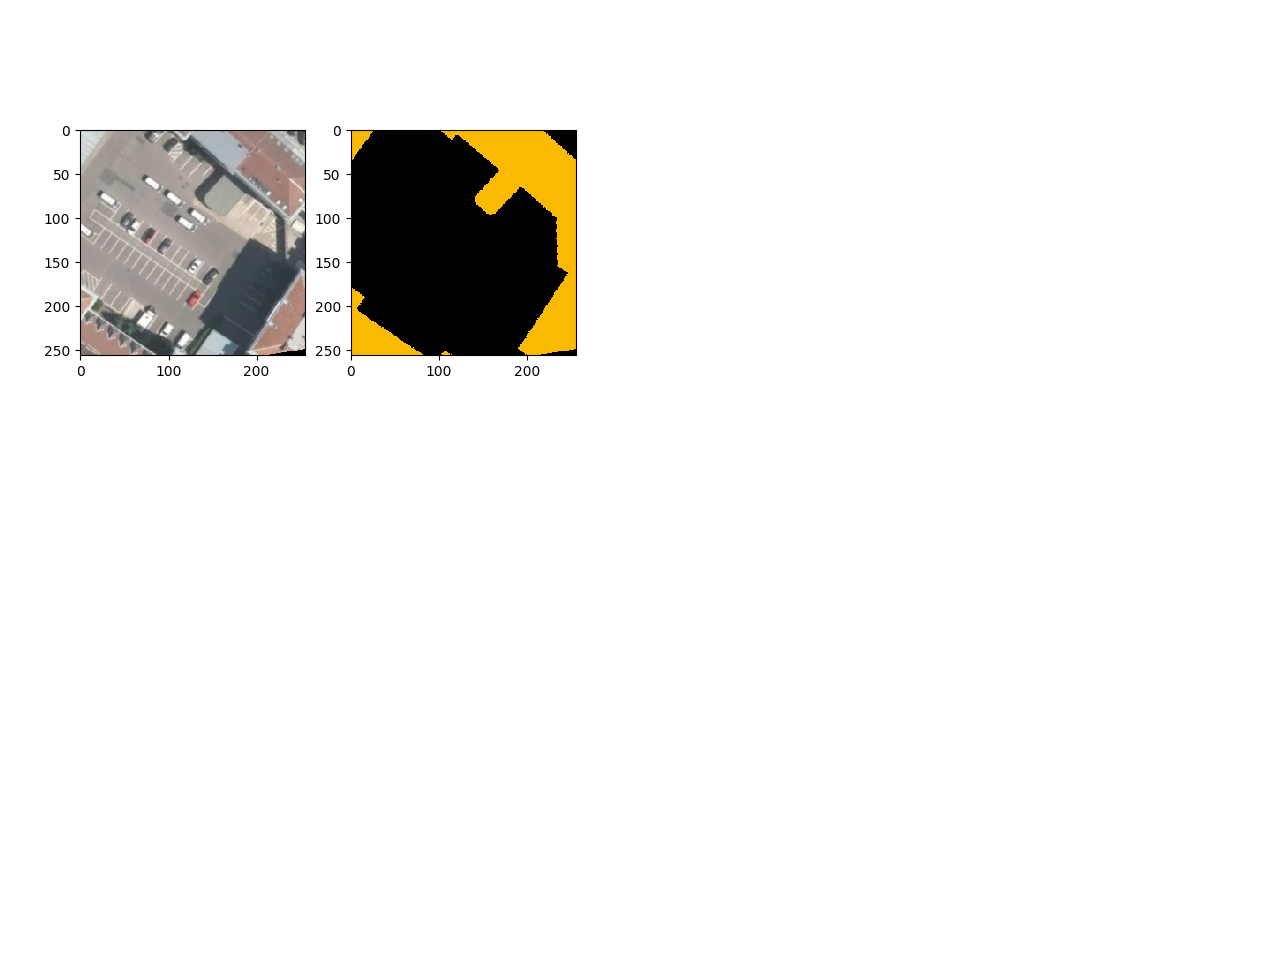

KeyboardInterrupt: 

In [11]:
fig, ax = plt.subplots(1, 2)
fig.show()

# Assign a color to each class
colors_dict = {}
colors_dict[0] = [0, 0, 0]  # background
colors_dict[1] = [252, 186, 3]  # foreground


iterator = iter(train_dataset)

for _ in range(1000):
    augmented_img, target = next(iterator)
    augmented_img = augmented_img[0]   # First element
    augmented_img = augmented_img * 255  # denormalize
    
    target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)
    
    # Assign colors (just for visualization)
    target_img = np.zeros([target.shape[0], target.shape[1], 3])
    
    target_img[np.where(target == 0)] = colors_dict[0]
    target_img[np.where(target == 1)] = colors_dict[1]
    
    ax[0].imshow(np.uint8(augmented_img))
    ax[1].imshow(np.uint8(target_img))
    
    fig.canvas.draw()
    time.sleep(1)